In [94]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 0.준비

In [95]:
import pandas as pd

In [230]:
train = pd.read_csv('/content/drive/MyDrive/data/여행상품신청/train.csv')
test = pd.read_csv('/content/drive/MyDrive/data/여행상품신청/test.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/data/여행상품신청/sample_submission.csv')

- id : 샘플 아이디
- Age : 나이
- TypeofContact : 고객의 제품 인지 방법 (회사의 홍보 or 스스로 검색)
- CityTier : 주거 중인 도시의 등급. (인구, 시설, 생활 수준 기준) (1등급 > 2등급 > 3등급) 
- DurationOfPitch : 영업 사원이 고객에게 제공하는 프레젠테이션 기간
- Occupation : 직업
- Gender : 성별
- NumberOfPersonVisiting : 고객과 함께 여행을 계획 중인 총 인원
- NumberOfFollowups : 영업 사원의 프레젠테이션 후 이루어진 후속 조치 수
- ProductPitched : 영업 사원이 제시한 상품
- PreferredPropertyStar : 선호 호텔 숙박업소 등급
- MaritalStatus : 결혼여부
- NumberOfTrips : 평균 연간 여행 횟수
- Passport : 여권 보유 여부 (0: 없음, 1: 있음)
- PitchSatisfactionScore : 영업 사원의 프레젠테이션 만족도
- OwnCar : 자동차 보유 여부 (0: 없음, 1: 있음)
- NumberOfChildrenVisiting : 함께 여행을 계획 중인 5세 미만의 어린이 수
- Designation : (직업의) 직급
- MonthlyIncome : 월 급여
- ProdTaken : 여행 패키지 신청 여부 (0: 신청 안 함, 1: 신청함)

In [231]:
train

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,Self Enquiry,1,10.0,Small Business,Male,3,5.0,Basic,3.0,Single,2.0,0,1,1,2.0,Executive,20723.0,0
1951,1952,41.0,Self Enquiry,3,8.0,Salaried,Female,3,3.0,Super Deluxe,5.0,Divorced,1.0,0,5,1,1.0,AVP,31595.0,0
1952,1953,38.0,Company Invited,3,28.0,Small Business,Female,3,4.0,Basic,3.0,Divorced,7.0,0,2,1,2.0,Executive,21651.0,0
1953,1954,28.0,Self Enquiry,3,30.0,Small Business,Female,3,5.0,Deluxe,3.0,Married,3.0,0,1,1,2.0,Manager,22218.0,0


## 0.1.데이터 전처리

### 0.1.1.결측치 처리

In [232]:
train.isna().sum()

id                            0
Age                          94
TypeofContact                10
CityTier                      0
DurationOfPitch             102
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            13
ProductPitched                0
PreferredPropertyStar        10
MaritalStatus                 0
NumberOfTrips                57
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     27
Designation                   0
MonthlyIncome               100
ProdTaken                     0
dtype: int64

In [233]:
def handle_na(data):
    temp = data.copy()
    for col, dtype in temp.dtypes.items():
        if dtype == 'object':
            # 문자형 칼럼의 경우 'Unknown'을 채워줍니다.
            value = 'Unknown'
        elif dtype == int or dtype == float:
            # 수치형 칼럼의 경우 0을 채워줍니다.
            value = 0
        temp.loc[:,col] = temp[col].fillna(value)
    return temp

train_nona = handle_na(train)

# 결측치 처리가 잘 되었는지 확인해 줍니다.
train_nona.isna().sum()

id                          0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
ProdTaken                   0
dtype: int64

### 0.1.2.문자형 변수 전처리

In [234]:
object_columns = train_nona.columns[train_nona.dtypes == 'object']
print('object 칼럼은 다음과 같습니다 : ', list(object_columns))

# 해당 칼럼만 보아서 봅시다
train_nona[object_columns]

object 칼럼은 다음과 같습니다 :  ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
0,Company Invited,Small Business,Male,Basic,Married,Executive
1,Self Enquiry,Small Business,Female,Deluxe,Single,Manager
2,Company Invited,Salaried,Male,Deluxe,Married,Manager
3,Company Invited,Small Business,Male,Basic,Married,Executive
4,Self Enquiry,Salaried,Male,Deluxe,Divorced,Manager
...,...,...,...,...,...,...
1950,Self Enquiry,Small Business,Male,Basic,Single,Executive
1951,Self Enquiry,Salaried,Female,Super Deluxe,Divorced,AVP
1952,Company Invited,Small Business,Female,Basic,Divorced,Executive
1953,Self Enquiry,Small Business,Female,Deluxe,Married,Manager


In [235]:
train_nona['Occupation'].unique()

array(['Small Business', 'Salaried', 'Large Business', 'Free Lancer'],
      dtype=object)

In [236]:
train_nona['ProductPitched'].unique()

array(['Basic', 'Deluxe', 'King', 'Standard', 'Super Deluxe'],
      dtype=object)

In [237]:
train_nona['Designation'].unique()

array(['Executive', 'Manager', 'VP', 'Senior Manager', 'AVP'],
      dtype=object)

In [238]:
train_nona['MaritalStatus'].unique()

array(['Married', 'Single', 'Divorced', 'Unmarried'], dtype=object)

In [239]:
train_nona['Gender'].value_counts()

Male       1207
Female      692
Fe Male      56
Name: Gender, dtype: int64

In [240]:
train_nona.loc[train_nona['Gender']=='Fe Male','Gender'] = 'Female'
test.loc[test['Gender']=='Fe Male','Gender'] = 'Female'
train_nona['Gender'].value_counts()

Male      1207
Female     748
Name: Gender, dtype: int64

In [241]:
# LabelEncoder를 준비해줍니다.
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# LabelEcoder는 학습하는 과정을 필요로 합니다.
encoder.fit(train_nona['TypeofContact'])

#학습된 encoder를 사용하여 문자형 변수를 숫자로 변환해줍니다.
encoder.transform(train_nona['TypeofContact'])

array([0, 1, 0, ..., 0, 1, 0])

In [242]:
train_enc = train_nona.copy()

# 모든 문자형 변수에 대해 encoder를 적용합니다.
for o_col in object_columns:
    encoder = LabelEncoder()
    encoder.fit(train_enc[o_col])
    train_enc[o_col] = encoder.transform(train_enc[o_col])

# 결과를 확인합니다.
train_enc

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,0,1,10.0,3,1,3,4.0,0,3.0,1,3.0,0,1,0,1.0,1,20384.0,0
1,2,34.0,1,3,0.0,3,0,2,4.0,1,4.0,2,1.0,1,5,1,0.0,2,19599.0,1
2,3,45.0,0,1,0.0,2,1,2,3.0,1,4.0,1,2.0,0,4,1,0.0,2,0.0,0
3,4,29.0,0,1,7.0,3,1,3,5.0,0,4.0,1,3.0,0,4,0,1.0,1,21274.0,1
4,5,42.0,1,3,6.0,2,1,2,3.0,1,3.0,0,2.0,0,3,1,0.0,2,19907.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,1,1,10.0,3,1,3,5.0,0,3.0,2,2.0,0,1,1,2.0,1,20723.0,0
1951,1952,41.0,1,3,8.0,2,0,3,3.0,4,5.0,0,1.0,0,5,1,1.0,0,31595.0,0
1952,1953,38.0,0,3,28.0,3,0,3,4.0,0,3.0,0,7.0,0,2,1,2.0,1,21651.0,0
1953,1954,28.0,1,3,30.0,3,0,3,5.0,1,3.0,1,3.0,0,1,1,2.0,2,22218.0,0


In [243]:
# 결측치 처리
test = handle_na(test)

# 문자형 변수 전처리
for o_col in object_columns:
    encoder = LabelEncoder()
    
    # test 데이터를 이용해 encoder를 학습하는 것은 Data Leakage 입니다! 조심!
    encoder.fit(train_nona[o_col])
    
    # test 데이터는 오로지 transform 에서만 사용되어야 합니다.
    test[o_col] = encoder.transform(test[o_col])

# 결과를 확인합니다.
test

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,32.0,0,3,0.0,3,1,2,5.0,1,3.0,1,1.0,0,2,0,1.0,2,19668.0
1,2,46.0,1,2,11.0,3,1,3,0.0,1,4.0,1,1.0,1,5,0,1.0,2,20021.0
2,3,37.0,1,3,22.0,3,1,3,4.0,1,3.0,1,5.0,0,5,1,0.0,2,21334.0
3,4,43.0,1,1,36.0,3,1,3,6.0,1,3.0,3,6.0,0,3,1,2.0,2,22950.0
4,5,25.0,1,3,7.0,1,0,4,4.0,0,4.0,3,3.0,1,4,1,3.0,1,21880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,2929,54.0,1,1,6.0,3,0,2,3.0,4,3.0,2,7.0,0,4,1,1.0,0,32328.0
2929,2930,33.0,1,1,9.0,3,0,4,2.0,1,3.0,3,2.0,0,3,0,1.0,2,23733.0
2930,2931,33.0,0,1,31.0,2,1,4,4.0,1,3.0,0,3.0,0,4,1,1.0,2,23987.0
2931,2932,26.0,1,1,9.0,3,1,4,2.0,0,5.0,3,2.0,0,2,1,3.0,1,22102.0


# 1.EDA

## 1.0.가설 설정

1. 여행패키지 신청여부(target)는 고객의 재산과 관련된 feature와 상관관계가 있을 것이다.
2. 각 재산과 관련된 feature는 상관관계가 있을 것이다. ex) 차 유무와 직급
3.  NumberOfTrips(평균연간여행횟수)는 MonthlyIncome(월 급여) 와 상관관계가 있을 것이다.
4. DurationOfPitch(영업사원이 제공하는 프레젠테이션 기간)와 PitchSatisfactionScore(프레젠테이션 만족도)는 상관관계가 있을 것이다. 

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 1.1.target

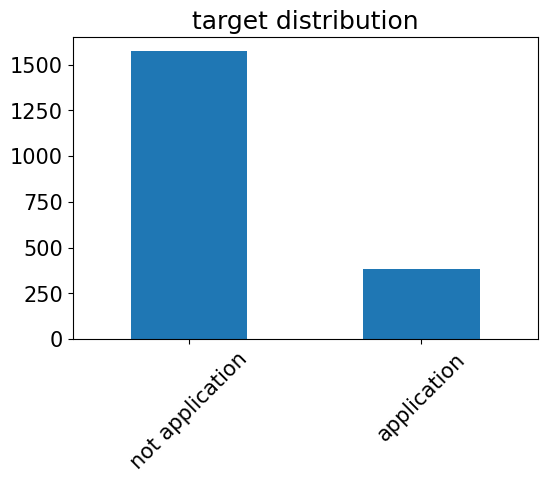

In [111]:
plt.figure(dpi=100)
train_enc['ProdTaken'].value_counts().plot(kind='bar')
plt.title('target distribution')
plt.xticks(np.arange(2),labels = ['not application','application'],rotation=45)
plt.show()

## 1.2.feature & target

### 1.2.1.Feature correlatoin(feature importances)

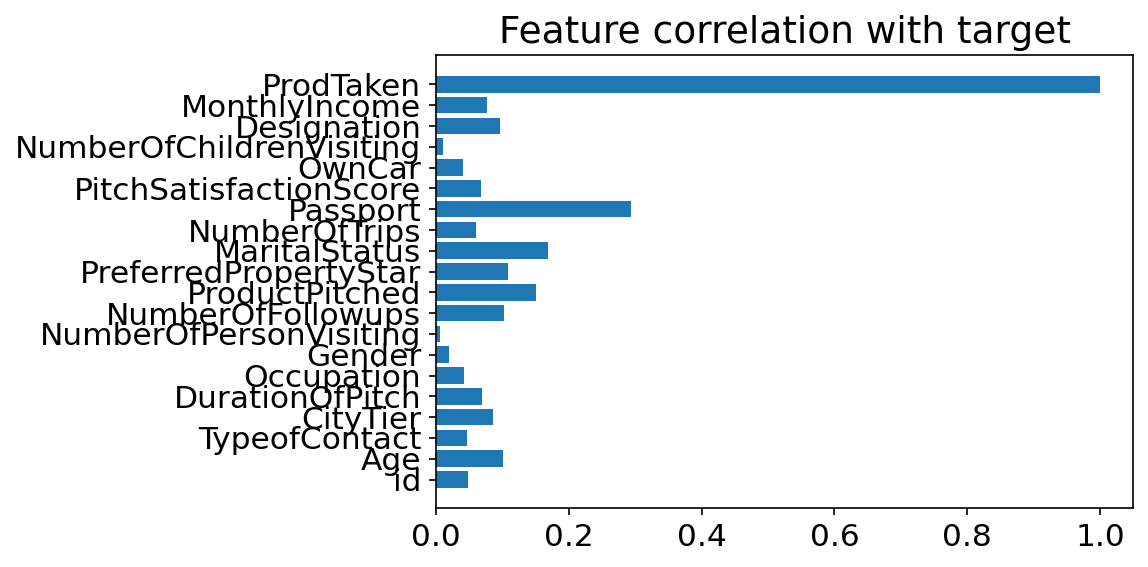

In [112]:
y = np.arange(len(train_enc.corr()['ProdTaken'].values))
ind = train_enc.corr()['ProdTaken'].index

values = abs(train_enc.corr()['ProdTaken'].values)

plt.figure(dpi=150)

plt.title('Feature correlation with target')
plt.barh(y,values)
plt.yticks(y,ind)

plt.show()

- 여권의 유무가 target과 가장 상관관계가 높은 것을 알 수 있다.

### 1.2.2.CityTier ~ target

In [113]:
train_enc.groupby(['CityTier','ProdTaken'])['id'].count()

CityTier  ProdTaken
1         0            1065
          1             218
2         0              66
          1              24
3         0             441
          1             141
Name: id, dtype: int64

In [114]:
temp = train_enc.groupby(['CityTier','ProdTaken'])['id'].count().values
temp

array([1065,  218,   66,   24,  441,  141])

In [115]:
no_application = temp[[0,2,4]]
application = temp[[1,3,5]]
alpha = 0.5
no_application

array([1065,   66,  441])

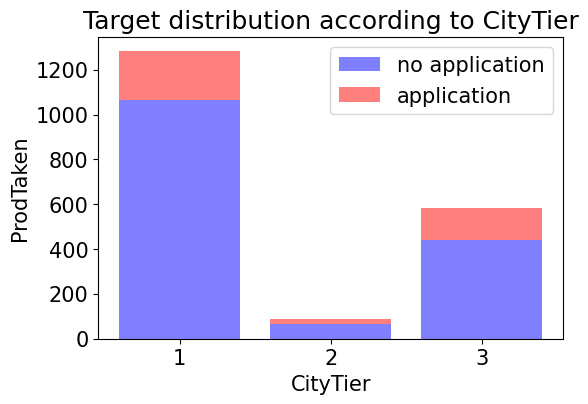

In [116]:
plt.figure(dpi=100)
p1 = plt.bar(np.arange(3), no_application, color='b', alpha=alpha)
p2 = plt.bar(np.arange(3), application, color='r', alpha=alpha,bottom=no_application) # stacked bar chart

plt.title('Target distribution according to CityTier')
plt.xlabel('CityTier')
plt.ylabel('ProdTaken')
plt.xticks(np.arange(3),labels=[1,2,3])
plt.legend((p1[0],p2[0]),('no application','application'))
plt.show()

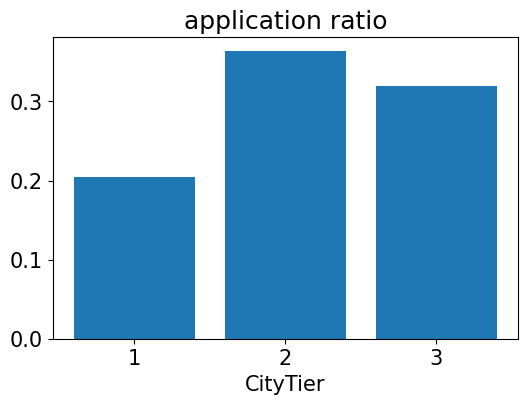

In [117]:
ratio  = application / no_application
plt.figure(dpi=100)
plt.bar(np.arange(3),ratio)
plt.xlabel('CityTier')
plt.title('application ratio')
plt.xticks(np.arange(3),labels=[1,2,3])
plt.show()

- 그래프를 통해 2등급 도시에는 주거 중인 시민이 별로 없다는 것을 알 수 있다.
- 또한 신청자 수는 1등급 도시에서 가장 많았지만 각 도시별 신청자 수 비율을 보면 2등급 도시가 가장 높은 것을 알 수 있다.

### 1.2.3.Passport ~ target

In [118]:
train_enc.groupby(['Passport','ProdTaken'])['id'].count()

Passport  ProdTaken
0         0            1218
          1             168
1         0             354
          1             215
Name: id, dtype: int64

In [119]:
temp = train_enc.groupby(['Passport','ProdTaken'])['id'].count().values
temp

array([1218,  168,  354,  215])

In [120]:
no_application = temp[[0,2]]
application = temp[[1,3]]
alpha = 0.5
no_application

array([1218,  354])

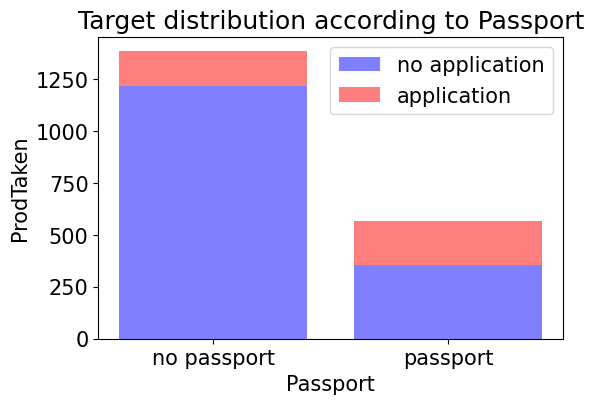

In [121]:
plt.figure(dpi=100)
p1 = plt.bar(np.arange(2), no_application, color='b', alpha=alpha)
p2 = plt.bar(np.arange(2), application, color='r', alpha=alpha,bottom=no_application) # stacked bar chart

plt.title('Target distribution according to Passport')
plt.xlabel('Passport')
plt.ylabel('ProdTaken')
plt.xticks(np.arange(2),labels=['no passport','passport'])
plt.legend((p1[0],p2[0]),('no application','application'))
plt.show()

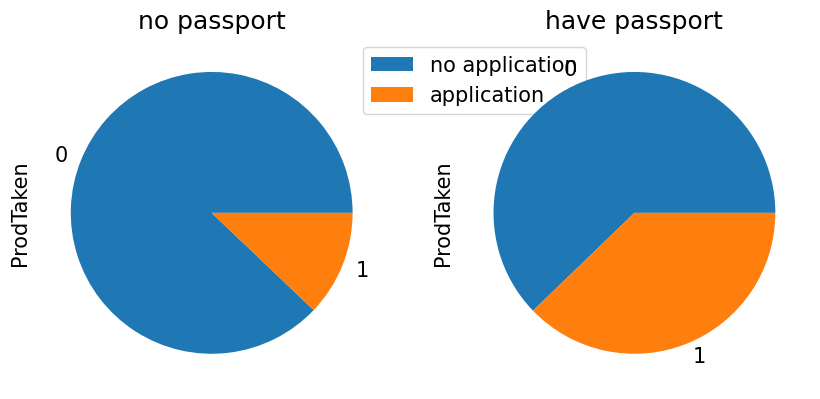

In [122]:
fig=plt.figure(figsize=(10,10), dpi=100)
(ax1, ax2)=fig.subplots(1,2).flatten()

temp = train_enc[train_enc['Passport']==0].reset_index(drop = True)
x = temp['ProdTaken'].value_counts()
x.plot.pie(ax=ax1)
_=ax1.set_title('no passport')
ax1.legend(bbox_to_anchor=(0.9, 1), loc=2,labels=['no application','application'])

temp = train_enc[train_enc['Passport']==1].reset_index(drop = True)
x = temp['ProdTaken'].value_counts()
x.plot.pie(ax=ax2)
_=ax2.set_title('have passport')


plt.show()

- 그래프를 통해 여권을 가지고 있는 사람은 가지고 있지 않는 사람보다 더 높은 비율로 신청을 하는 것으로 보인다. (어찌보면 당연한 결과이다.)

### 1.2.4. ProductPitched ~ target

In [123]:
train_nona['ProductPitched'].unique()

array(['Basic', 'Deluxe', 'King', 'Standard', 'Super Deluxe'],
      dtype=object)

In [124]:
train_nona.groupby(['ProductPitched','ProdTaken'])['id'].count()

ProductPitched  ProdTaken
Basic           0            522
                1            223
Deluxe          0            599
                1             90
King            0             80
                1              9
Standard        0            251
                1             51
Super Deluxe    0            120
                1             10
Name: id, dtype: int64

In [125]:
temp = train_nona.groupby(['ProductPitched','ProdTaken'])['id'].count().values
temp

array([522, 223, 599,  90,  80,   9, 251,  51, 120,  10])

In [126]:
ind = train_nona['ProductPitched'].unique()
ind

array(['Basic', 'Deluxe', 'King', 'Standard', 'Super Deluxe'],
      dtype=object)

In [127]:
no_application = temp[[0,2,4,6,8]]
application = temp[[1,3,5,7,9]]
alpha = 0.5
no_application

array([522, 599,  80, 251, 120])

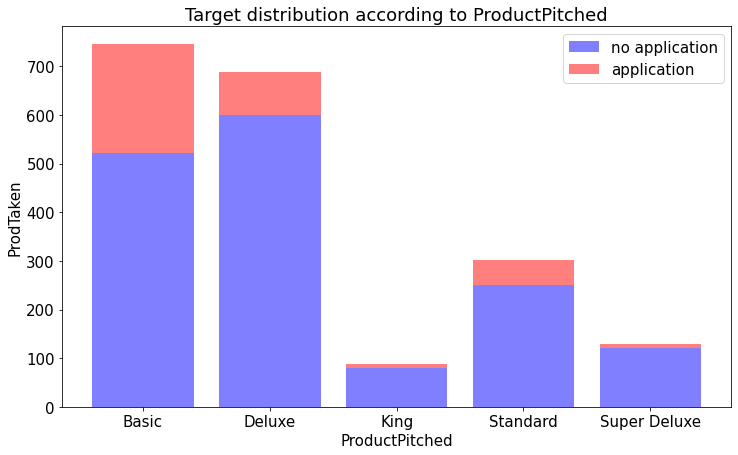

In [128]:
plt.figure(figsize=(12,7))
p1 = plt.bar(np.arange(5), no_application, color='b', alpha=alpha)
p2 = plt.bar(np.arange(5), application, color='r', alpha=alpha,bottom=no_application) # stacked bar chart

plt.title('Target distribution according to ProductPitched')
plt.xlabel('ProductPitched')
plt.ylabel('ProdTaken')
plt.xticks(np.arange(5),labels=ind)
plt.legend((p1[0],p2[0]),('no application','application'))
plt.show()

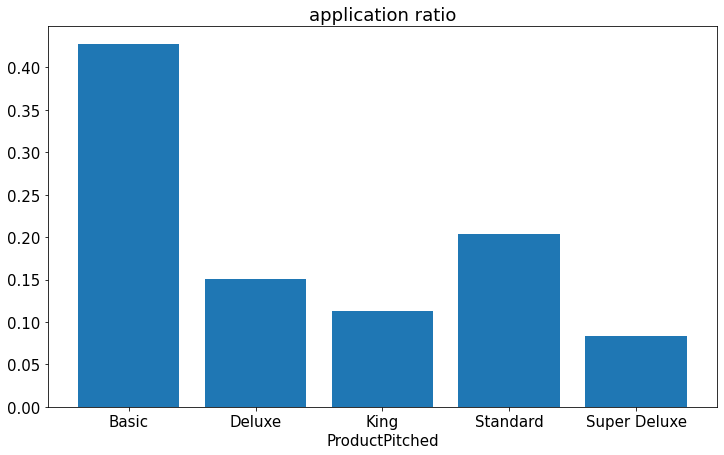

In [129]:
ratio  = application / no_application
plt.figure(figsize=(12,7))
plt.bar(np.arange(5),ratio)
plt.xlabel('ProductPitched')
plt.title('application ratio')
plt.xticks(np.arange(5),labels=ind)
plt.show()

- 그래프를 통해 영업사원이 Basic 상품을 추천했을때 가장 신청률이 높은 것을 알 수 있다.

### 1.2.5.MaritalStatus ~ target

In [130]:
train_nona['MaritalStatus'].value_counts()

Married      949
Divorced     375
Single       349
Unmarried    282
Name: MaritalStatus, dtype: int64

In [131]:
train_enc['MaritalStatus'].value_counts()

1    949
0    375
2    349
3    282
Name: MaritalStatus, dtype: int64

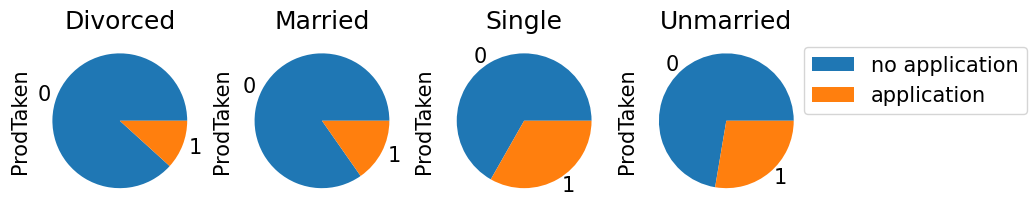

In [132]:
fig=plt.figure(figsize=(10,10), dpi=100)
(ax1, ax2,ax3,ax4)=fig.subplots(1,4).flatten()

temp = train_enc[train_enc['MaritalStatus']==0].reset_index(drop = True)
x = temp['ProdTaken'].value_counts()
x.plot.pie(ax=ax1)
_=ax1.set_title('Divorced')


temp = train_enc[train_enc['MaritalStatus']==1].reset_index(drop = True)
x = temp['ProdTaken'].value_counts()
x.plot.pie(ax=ax2)
_=ax2.set_title('Married')

temp = train_enc[train_enc['MaritalStatus']==2].reset_index(drop = True)
x = temp['ProdTaken'].value_counts()
x.plot.pie(ax=ax3)
_=ax3.set_title('Single')

temp = train_enc[train_enc['MaritalStatus']==3].reset_index(drop = True)
x = temp['ProdTaken'].value_counts()
x.plot.pie(ax=ax4)
_=ax4.set_title('Unmarried')
ax4.legend(bbox_to_anchor=(0.9, 1), loc=2,labels=['no application','application'])
plt.show() 

- Divorced 는 이혼한 사람을 뜻하는데 이혼한 사람과 결혼한 사람이 비슷한 신청률을 보였고, 미혼인 사람과 싱글인 사람이 25퍼센트가 넘는 신청률을 보였다.

### 1.2.6.CityTier ~ MonthlyIncome

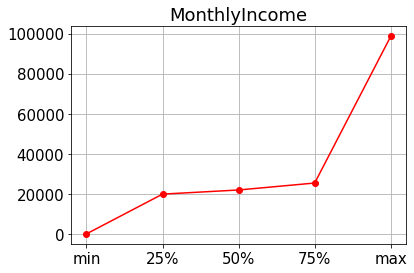

In [133]:
plt.rcParams['font.size'] = 15
data = train_enc.describe().loc['min':'max', 'MonthlyIncome']

plt.title('MonthlyIncome')
plt.plot(data, color = 'red', marker = 'o')
plt.grid(True)

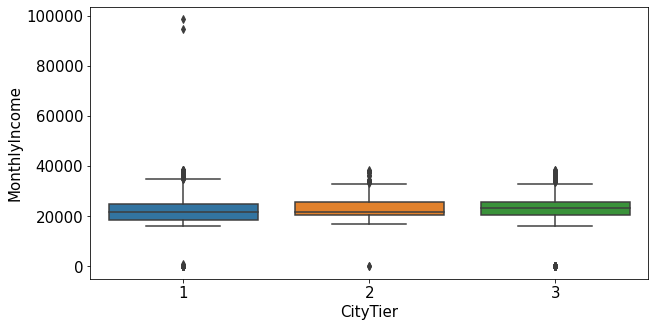

In [134]:
plt.figure(figsize=(10,5))
sns.boxplot(data=train_nona, x="CityTier", y="MonthlyIncome")
plt.show()

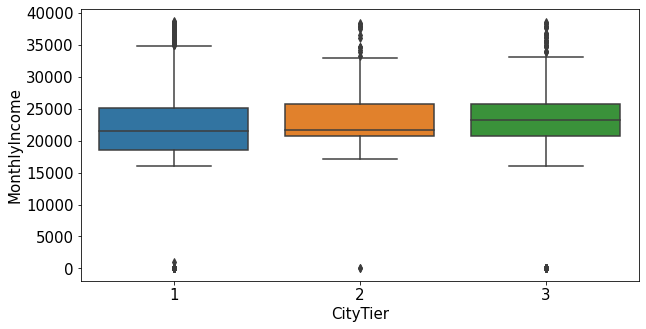

In [135]:
plt.figure(figsize=(10,5))
sns.boxplot(data=train_nona[train_nona['MonthlyIncome']<60000], x="CityTier", y="MonthlyIncome")
plt.show()

### 1.2.7.Designation ~ MonthlyIncome

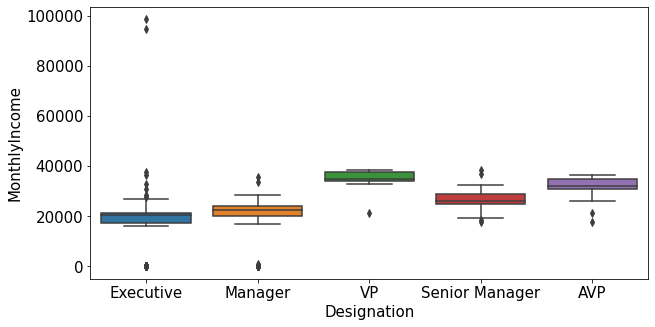

In [136]:
plt.figure(figsize=(10,5))
sns.boxplot(data=train_nona, x="Designation", y="MonthlyIncome")
plt.show()

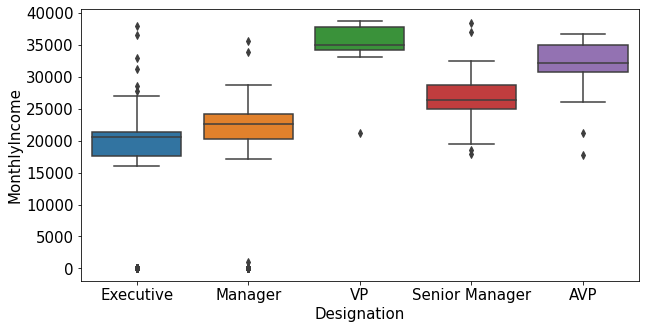

In [137]:
plt.figure(figsize=(10,5))
sns.boxplot(data=train_nona[train_nona['MonthlyIncome']<60000], x="Designation", y="MonthlyIncome")
plt.show()

- MonthlyIncome의 이상치는 특정한 도시 등급과 직급에서 발견됨.

### 1.2.8.NumberOfTrips ~ MonthlyIncome



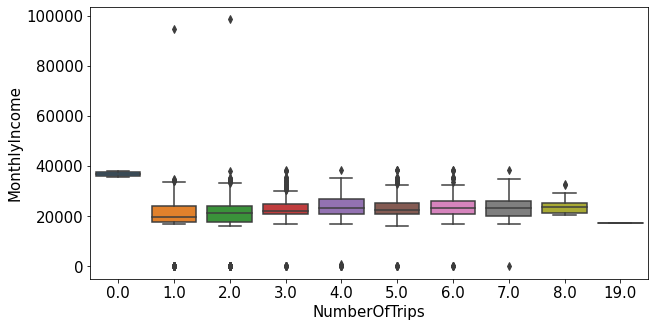

In [138]:
plt.figure(figsize=(10,5))
sns.boxplot(data=train_nona, x="NumberOfTrips", y="MonthlyIncome")
plt.show()

### 1.2.9.DurationOfPitch ~ PitchSatisfactionScore



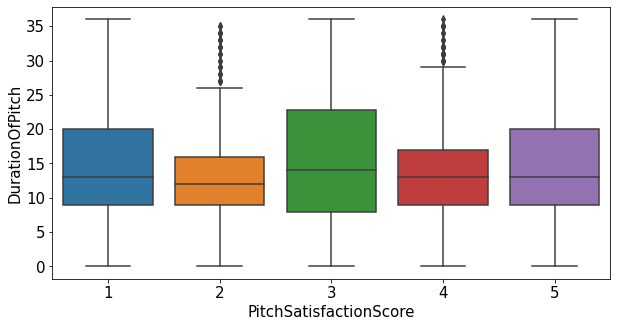

In [139]:
plt.figure(figsize=(10,5))
sns.boxplot(data=train_enc, x="PitchSatisfactionScore", y="DurationOfPitch")
plt.show()

- 두 변수간 큰 상관관계가 없는 것으로 보임

### 1.2.10.heatmap

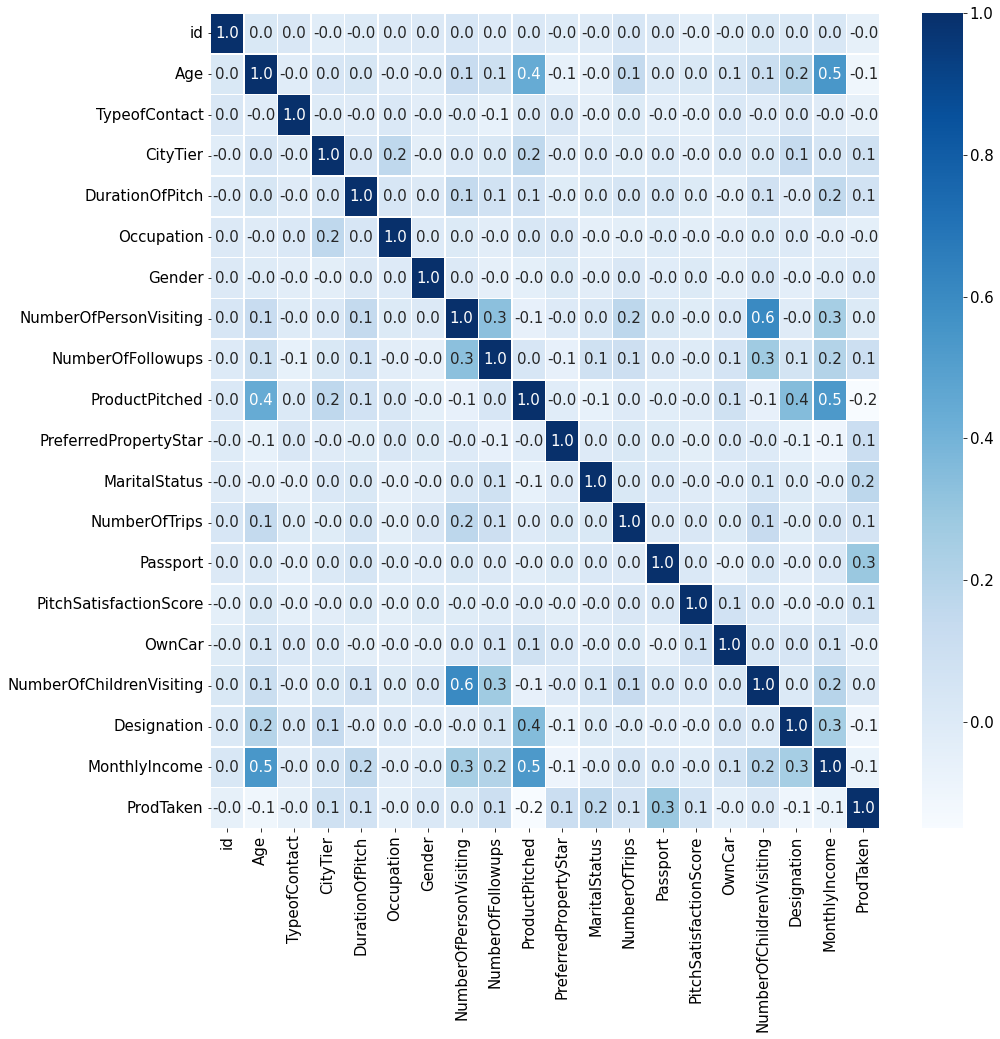

In [140]:
plt.figure(figsize=(15,15))
sns.heatmap(train_enc.corr(method='pearson'),annot=True, fmt='.1f', linewidths=.5, cmap='Blues')


## 1.3.heatmap 정보를 기반으로 EDA

### 1.3.1. MonthlyIncome ~ Age

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


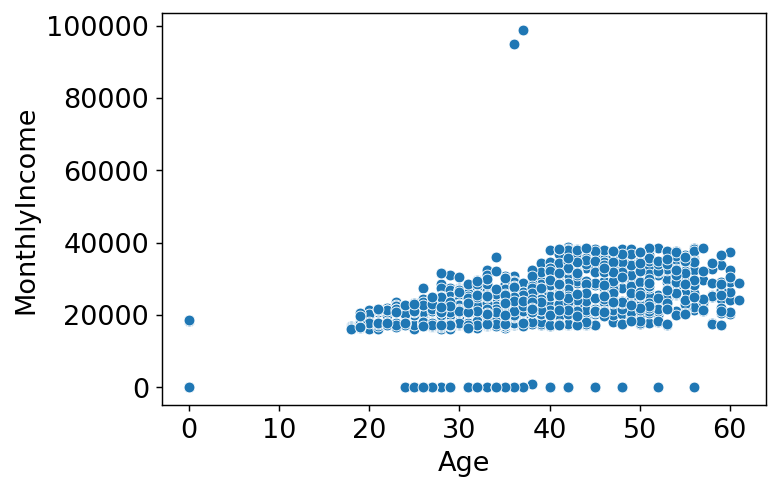

In [244]:
plt.figure(dpi=130)

sns.scatterplot(train_enc['Age'],train_enc['MonthlyIncome'])
plt.xlabel('Age')
plt.ylabel('MonthlyIncome')
plt.show()

- 나이가 0인 데이터가 확인되고 또 그 중 월 급여가 0이 아닌 데이터가 보인다. 데이터의 오류가 아닐까 싶어 Age데이터를 확인해 봐야겠다.

In [245]:
train_enc[train_enc['Age']==0]

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
13,14,0.0,1,3,6.0,3,1,2,1.0,1,5.0,1,2.0,0,4,0,0.0,2,0.0,0
26,27,0.0,1,1,6.0,3,0,3,3.0,0,5.0,1,2.0,0,1,1,0.0,1,18591.0,0
35,36,0.0,1,2,14.0,2,1,2,3.0,1,4.0,1,3.0,0,3,1,1.0,2,0.0,0
87,88,0.0,1,2,8.0,2,1,3,3.0,0,3.0,2,1.0,0,1,0,0.0,1,18539.0,0
121,122,0.0,1,1,35.0,3,1,3,3.0,0,5.0,1,2.0,0,4,1,1.0,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1882,1883,0.0,1,1,15.0,2,1,1,4.0,0,3.0,2,1.0,0,2,1,0.0,1,0.0,0
1888,1889,0.0,1,1,12.0,3,0,3,4.0,1,3.0,2,2.0,1,4,1,1.0,2,0.0,0
1914,1915,0.0,1,1,7.0,2,0,3,3.0,0,3.0,1,2.0,0,1,1,2.0,1,0.0,0
1916,1917,0.0,1,2,26.0,3,0,3,3.0,0,4.0,1,1.0,1,3,0,1.0,1,18669.0,1


In [246]:
test[test['Age']==0]

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
20,21,0.0,1,1,8.0,3,1,2,5.0,0,3.0,1,6.0,1,3,1,1.0,1,18464.0
25,26,0.0,1,1,12.0,2,0,2,4.0,0,3.0,1,2.0,0,3,0,1.0,1,18702.0
54,55,0.0,1,1,6.0,3,1,2,3.0,0,4.0,1,2.0,0,3,0,0.0,1,0.0
67,68,0.0,1,1,6.0,3,1,3,3.0,0,4.0,1,2.0,0,5,0,1.0,1,0.0
95,96,0.0,0,1,15.0,2,1,2,3.0,1,3.0,1,4.0,0,3,1,0.0,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2799,2800,0.0,1,1,8.0,3,1,2,5.0,0,3.0,0,6.0,1,3,1,0.0,1,18464.0
2811,2812,0.0,1,1,13.0,2,1,3,1.0,0,5.0,2,1.0,0,1,1,0.0,1,18578.0
2834,2835,0.0,1,3,14.0,3,1,2,3.0,0,4.0,1,1.0,0,1,0,1.0,1,0.0
2841,2842,0.0,0,1,22.0,2,0,3,5.0,0,5.0,2,2.0,1,4,0,0.0,1,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


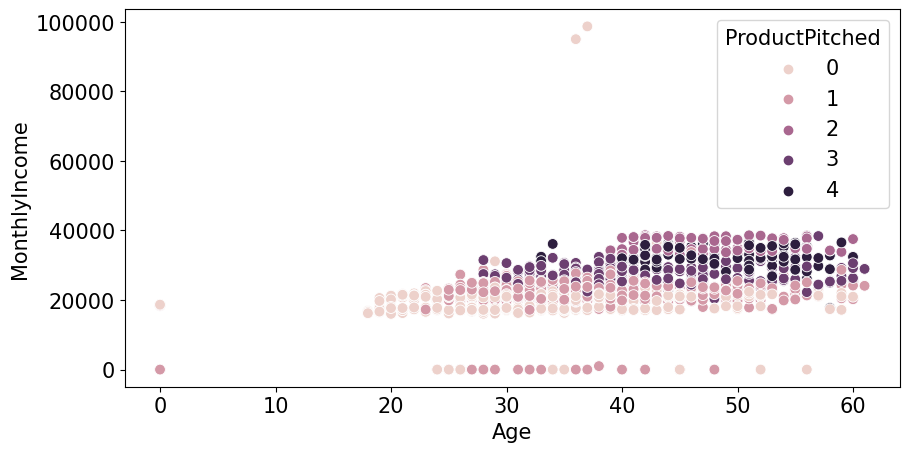

In [247]:
plt.figure(figsize=(10,5),dpi=100)

sns.scatterplot(train_enc['Age'],train_enc['MonthlyIncome'],hue=train_enc['ProductPitched'],s=60)
plt.xlabel('Age')
plt.ylabel('MonthlyIncome')

plt.legend(title='ProductPitched',loc='upper right')
plt.show()

#### 1.3.1.1.Age가 0인 데이터 age 예측

- age가 0일 수는 없다고 생각해서 다른 feature들로 age를 예측해봐야겠다고 생각했다.

In [248]:
temp = train_enc[train_enc['Age']!=0]
temp

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,0,1,10.0,3,1,3,4.0,0,3.0,1,3.0,0,1,0,1.0,1,20384.0,0
1,2,34.0,1,3,0.0,3,0,2,4.0,1,4.0,2,1.0,1,5,1,0.0,2,19599.0,1
2,3,45.0,0,1,0.0,2,1,2,3.0,1,4.0,1,2.0,0,4,1,0.0,2,0.0,0
3,4,29.0,0,1,7.0,3,1,3,5.0,0,4.0,1,3.0,0,4,0,1.0,1,21274.0,1
4,5,42.0,1,3,6.0,2,1,2,3.0,1,3.0,0,2.0,0,3,1,0.0,2,19907.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,1,1,10.0,3,1,3,5.0,0,3.0,2,2.0,0,1,1,2.0,1,20723.0,0
1951,1952,41.0,1,3,8.0,2,0,3,3.0,4,5.0,0,1.0,0,5,1,1.0,0,31595.0,0
1952,1953,38.0,0,3,28.0,3,0,3,4.0,0,3.0,0,7.0,0,2,1,2.0,1,21651.0,0
1953,1954,28.0,1,3,30.0,3,0,3,5.0,1,3.0,1,3.0,0,1,1,2.0,2,22218.0,0


In [249]:
features = temp.columns[2:-1]
target = 'Age'

In [250]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X = temp[features]
y = temp[target]

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.9,shuffle=False)
model_rf = RandomForestRegressor()

model_rf.fit(X_train,y_train)

predict = model_rf.predict(X_test)



In [251]:
y_test

1755    54.0
1756    59.0
1757    21.0
1758    43.0
1759    48.0
        ... 
1950    28.0
1951    41.0
1952    38.0
1953    28.0
1954    22.0
Name: Age, Length: 187, dtype: float64

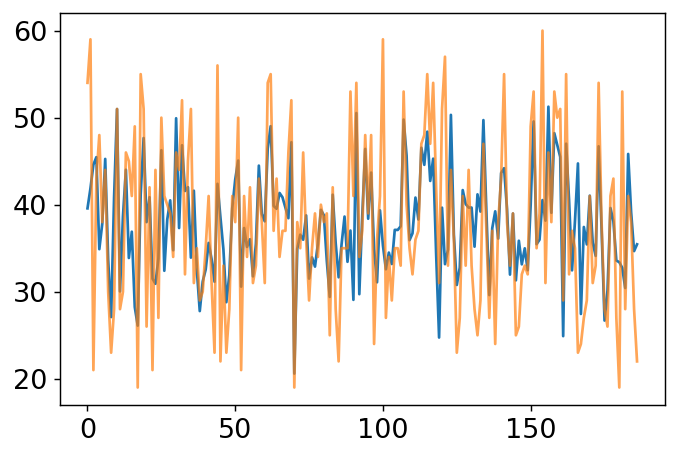

In [252]:
plt.figure(dpi=130)
plt.plot(predict)
plt.plot(y_test.values,alpha=0.7)
plt.show()

In [253]:
mean_absolute_error(predict,y_test)

5.675347593582887

In [254]:
temp = train_enc[train_enc['Age']==0]
temp

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
13,14,0.0,1,3,6.0,3,1,2,1.0,1,5.0,1,2.0,0,4,0,0.0,2,0.0,0
26,27,0.0,1,1,6.0,3,0,3,3.0,0,5.0,1,2.0,0,1,1,0.0,1,18591.0,0
35,36,0.0,1,2,14.0,2,1,2,3.0,1,4.0,1,3.0,0,3,1,1.0,2,0.0,0
87,88,0.0,1,2,8.0,2,1,3,3.0,0,3.0,2,1.0,0,1,0,0.0,1,18539.0,0
121,122,0.0,1,1,35.0,3,1,3,3.0,0,5.0,1,2.0,0,4,1,1.0,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1882,1883,0.0,1,1,15.0,2,1,1,4.0,0,3.0,2,1.0,0,2,1,0.0,1,0.0,0
1888,1889,0.0,1,1,12.0,3,0,3,4.0,1,3.0,2,2.0,1,4,1,1.0,2,0.0,0
1914,1915,0.0,1,1,7.0,2,0,3,3.0,0,3.0,1,2.0,0,1,1,2.0,1,0.0,0
1916,1917,0.0,1,2,26.0,3,0,3,3.0,0,4.0,1,1.0,1,3,0,1.0,1,18669.0,1


In [255]:
X = temp[features]

train_enc.loc[train_enc['Age']==0,'Age'] = model_rf.predict(X)

In [256]:
train_enc['Age'].value_counts().sort_index()

18.0     5
19.0    16
20.0    13
21.0    17
22.0    20
        ..
57.0     9
58.0    11
59.0    14
60.0    12
61.0     3
Name: Age, Length: 131, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


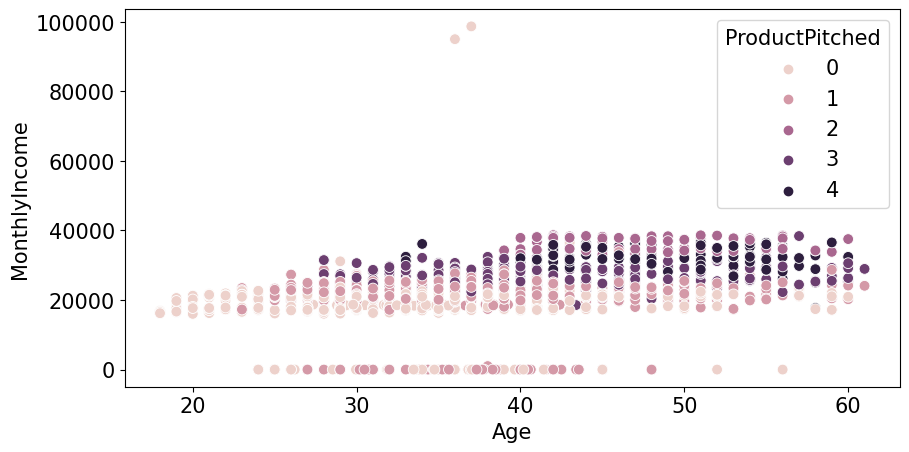

In [257]:
plt.figure(figsize=(10,5),dpi=100)

sns.scatterplot(train_enc['Age'],train_enc['MonthlyIncome'],hue=train_enc['ProductPitched'],s=60)
plt.xlabel('Age')
plt.ylabel('MonthlyIncome')

plt.legend(title='ProductPitched',loc='upper right')
plt.show()

- Age 가 0인 데이터가 없어진 것을 확인 할 수있다.

### 1.3.2.MonthlyIncome ~ NumberOfPersonVisiting

In [268]:
train_enc['NumberOfPersonVisiting'].value_counts()

3    988
2    543
4    412
1     11
5      1
Name: NumberOfPersonVisiting, dtype: int64

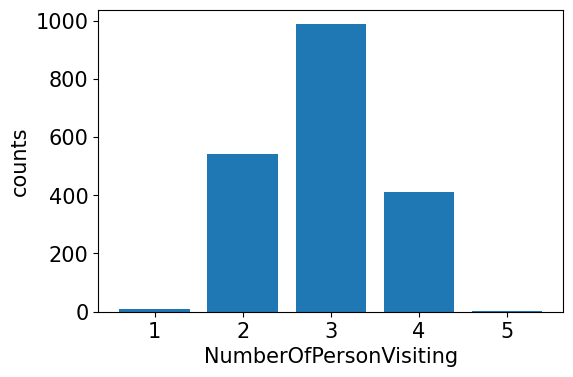

In [273]:
temp = train_enc['NumberOfPersonVisiting'].value_counts()

plt.figure(dpi=100)

plt.bar(temp.index,temp.values)
plt.xlabel('NumberOfPersonVisiting')
plt.ylabel('counts')
plt.show()

- 혼자 가거나 5명이서 가는 경우는 거의 없고 2,3,4명이서 가는 경우가 많다

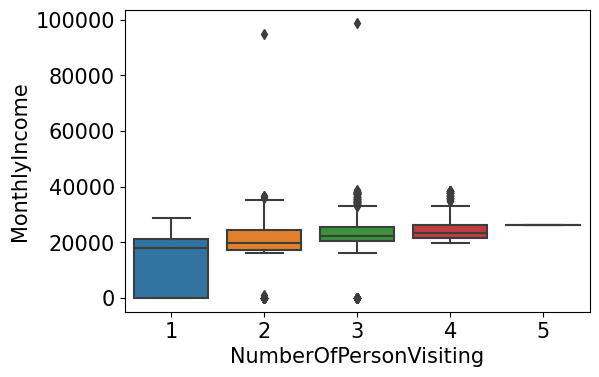

In [274]:
plt.figure(dpi=100)
sns.boxplot(data=train_enc, x="NumberOfPersonVisiting", y="MonthlyIncome")
plt.show()

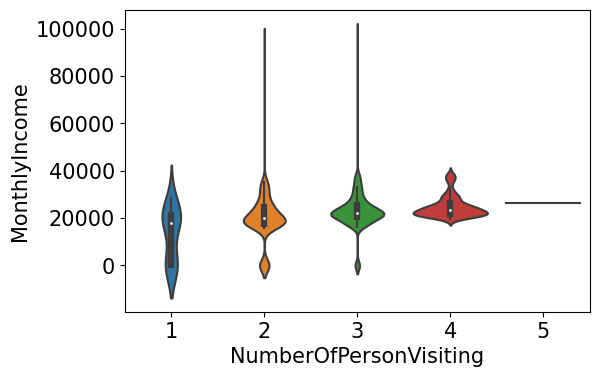

In [267]:
plt.figure(dpi=100)
sns.violinplot(data=train_enc, x="NumberOfPersonVisiting", y="MonthlyIncome")
plt.show()

- 2,3,4 에는 차이가 크지 않지만 확실히 혼자가는 사람은 월 급여가 낮은 것을 알 수 있다.

### 1.3.3.MonthlyIncome ~ DurationOfPitch

In [275]:
train_enc['DurationOfPitch'].value_counts()

9.0     199
7.0     126
8.0     122
6.0     116
16.0    114
14.0    112
15.0    105
10.0    103
0.0     102
12.0     85
11.0     83
13.0     83
17.0     75
23.0     41
30.0     39
22.0     36
31.0     34
25.0     32
27.0     31
32.0     30
20.0     29
35.0     29
26.0     27
29.0     27
24.0     27
28.0     25
21.0     24
18.0     23
33.0     22
19.0     18
34.0     18
36.0     15
5.0       3
Name: DurationOfPitch, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


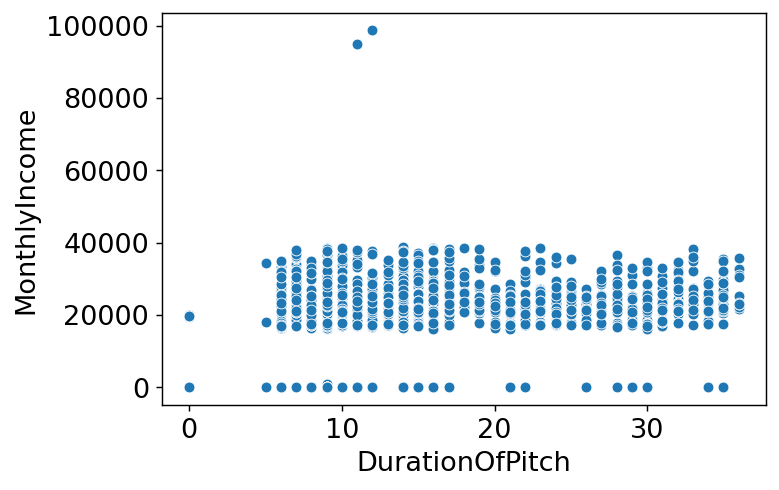

In [276]:
plt.figure(dpi=130)

sns.scatterplot(train_enc['DurationOfPitch'],train_enc['MonthlyIncome'])
plt.xlabel('DurationOfPitch')
plt.ylabel('MonthlyIncome')
plt.show()

- 상관관계를 찾기 힘들어보임.

# 2.파생변수